In [4]:
def cospectral(a, b, X):
    X_a = (X.delete_rows([a])).delete_columns([a])
    phi_a = X_a.charpoly()
    
    X_b = (X.delete_rows([b])).delete_columns([b])
    phi_b = X_b.charpoly()
    
    return phi_a==phi_b

In [11]:
def parallel(a, b, X):
    phi_X = X.charpoly()
    X_ab = X.delete_rows([a, b]).delete_columns([a, b])
    phi_ab = X_ab.charpoly()

    phi_X = X.charpoly()
    g = phi_X.gcd(phi_ab)
    f = phi_X / g
    f1 = f.derivative(x)

    val = f.gcd(f1)

    return val.derivative() == 0         

### Hypothesis: The Fractal Star has $2^k$ cospectral vertices and $2^{k-1}$ pairs of strongly cospectral vertices

In [94]:
class Fractal_Star:    
    def __init__(self, k):
        self.k = k
        self.sz = 2
        self.G = {0:[1], 1:[0]}
    
    def build(self, i, p, depth):
        if p != -1:
            self.G[i] = [p]
            self.G[p].append(i)
            
        if depth == 0:
            return
        
        self.sz += 1
        self.build(self.sz-1, i, depth-1)
        self.sz += 1
        self.build(self.sz-1, i, depth-1)
    
    def Graph(self):
        self.build(0, -1, self.k);
        self.build(1, -1, self.k);
        return self.G

In [131]:
def Fractal_test(k):
    FG = Fractal_Star(k)
    G = Graph(FG.Graph())

    G.plot().show()
    
    leaves = []
    for i in G.vertices():
        if G.degree(i) == 1:
            leaves.append(i)
            
    for i in range(len(leaves)-1):
        if not cospectral(leaves[i], leaves[i+1], G.adjacency_matrix()):
            raise Exception("FAIL HYPOTESIS TEST", "Cospectral")
        else:
            print(f"{leaves[i]}, {leaves[i+1]} are cospectral")
        
    print(f"All {len(leaves)} leaves are cospectral")

    for i in range(0, len(leaves), 2):
        if not parallel(leaves[i], leaves[i+1], G.adjacency_matrix()):
            raise Exception("FAIL HYPOTESIS TEST", "Parallel")
        else:
            print(f"{leaves[i]}, {leaves[i+1]} are parallel")
            
    print(f"All {len(leaves)//2} pairs of leaves are parallel")


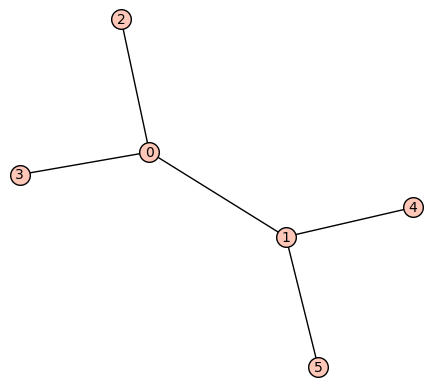

2, 3 are cospectral
3, 4 are cospectral
4, 5 are cospectral
All 4 leaves are cospectral
2, 3 are parallel
4, 5 are parallel
All 2 pairs of leaves are parallel


In [135]:
Fractal_test(1)

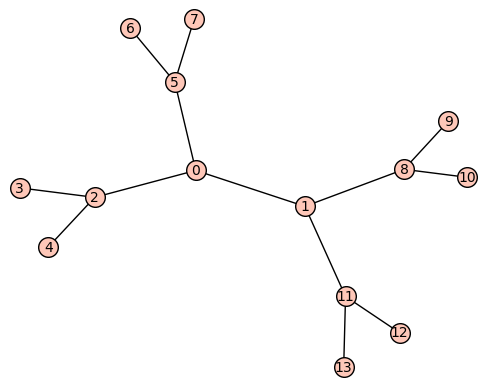

3, 4 are cospectral
4, 6 are cospectral
6, 7 are cospectral
7, 9 are cospectral
9, 10 are cospectral
10, 12 are cospectral
12, 13 are cospectral
All 8 leaves are cospectral
3, 4 are parallel
6, 7 are parallel
9, 10 are parallel
12, 13 are parallel
All 4 pairs of leaves are parallel


In [136]:
Fractal_test(2)

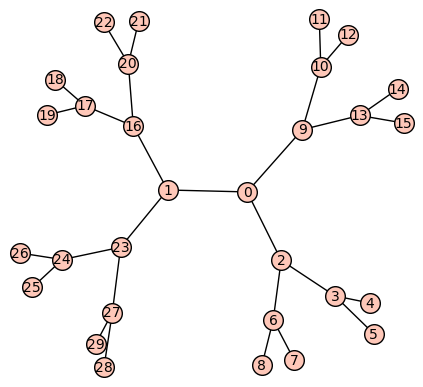

4, 5 are cospectral
5, 7 are cospectral
7, 8 are cospectral
8, 11 are cospectral
11, 12 are cospectral
12, 14 are cospectral
14, 15 are cospectral
15, 18 are cospectral
18, 19 are cospectral
19, 21 are cospectral
21, 22 are cospectral
22, 25 are cospectral
25, 26 are cospectral
26, 28 are cospectral
28, 29 are cospectral
All 16 leaves are cospectral


Exception: ('FAIL HYPOTESIS TEST', 'Parallel')

In [137]:
Fractal_test(3)

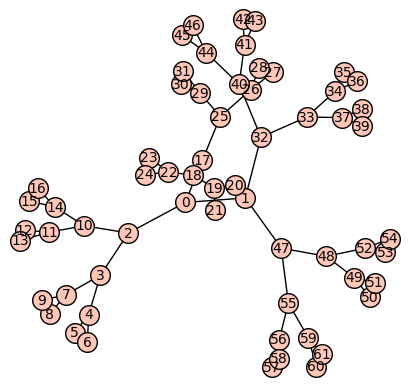

5, 6 are cospectral
6, 8 are cospectral
8, 9 are cospectral
9, 12 are cospectral
12, 13 are cospectral
13, 15 are cospectral
15, 16 are cospectral
16, 20 are cospectral
20, 21 are cospectral
21, 23 are cospectral
23, 24 are cospectral
24, 27 are cospectral
27, 28 are cospectral
28, 30 are cospectral
30, 31 are cospectral
31, 35 are cospectral
35, 36 are cospectral
36, 38 are cospectral
38, 39 are cospectral
39, 42 are cospectral
42, 43 are cospectral
43, 45 are cospectral
45, 46 are cospectral
46, 50 are cospectral
50, 51 are cospectral
51, 53 are cospectral
53, 54 are cospectral
54, 57 are cospectral
57, 58 are cospectral
58, 60 are cospectral
60, 61 are cospectral
All 32 leaves are cospectral


Exception: ('FAIL HYPOTESIS TEST', 'Parallel')

In [138]:
Fractal_test(4)